In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy import stats

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the Healthcare data
data = pd.ExcelFile('/Users/honghongzhang/Desktop/HealthCare/US_Healthcare_Expense_per_state_2010_2014.xls')
Healthcare = pd.read_excel(data,'clean_data')
Healthcare.head()



,Location,2014_Health_Spending,2013_Health_Spending,2012_Health_Spending,2011_Health_Spending,2010_Health_Spending,2014_Smoking,2013_Smoking,2012_Smoking,2011_Smoking,...,2012_Middle_Adult,2012_Senior,2011_Childhood,2011_Young_Adult,2011_Middle_Adult,2011_Senior,2010_Childhood,2010_Young_Adult,2010_Middle_Adult,2010_Senior
0,Alabama,7281,6996,6821,6541,6421,0.277492,0.275937,0.279381,0.287698,...,33.359722,14.501139,26.233509,26.199124,33.562926,14.004442,26.233509,26.199124,33.562926,14.004442
1,Alaska,11064,10428,10130,9586,9129,0.258841,0.283277,0.275062,0.274164,...,33.620087,8.554716,28.847685,28.967725,34.123632,8.060959,28.847685,28.967725,34.123632,8.060959
2,Arizona,6452,6262,6183,6076,6027,0.247508,0.247197,0.240968,0.244825,...,30.886183,14.805574,27.813570,26.840789,31.126622,14.219020,27.813570,26.840789,31.126622,14.219020
3,Arkansas,7408,6929,6804,6585,6412,0.274475,0.284254,0.279754,0.279639,...,32.098652,14.993619,26.966488,26.109493,32.375044,14.548975,26.966488,26.109493,32.375044,14.548975
4,California,7549,7256,7018,6737,6480,0.227492,0.227698,0.227746,0.229381,...,32.056241,12.098399,27.500369,28.668596,32.161695,11.669340,27.500369,28.668596,32.161695,11.669340


In [4]:
Health_spending = Healthcare.iloc[0:51, 0:6]
Health_spending_new = Health_spending.set_index("Location")
Health_spending_new.head()

,2014_Health_Spending,2013_Health_Spending,2012_Health_Spending,2011_Health_Spending,2010_Health_Spending
Location,,,,,
Alabama,7281,6996,6821,6541,6421
Alaska,11064,10428,10130,9586,9129
Arizona,6452,6262,6183,6076,6027
Arkansas,7408,6929,6804,6585,6412
California,7549,7256,7018,6737,6480


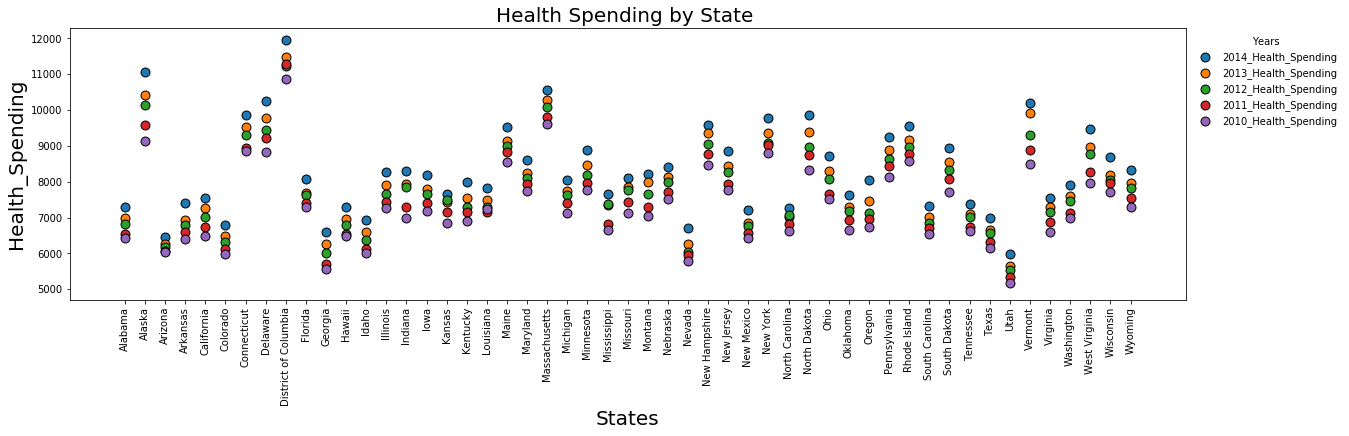

In [14]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(20,5))

plt.title('Health Spending by State ', fontsize = 20)
plt.xlabel('States', fontsize = 20)
plt.ylabel('Health_Spending', fontsize = 20)

x_axis = np.arange(0, len(Health_spending_new))
plt.ylim = (0, 12000, 2000)

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Health_spending_new.index, rotation=90)

[plt.scatter(x_axis, Health_spending_new[group], marker = "o", edgecolors="black", s=80) for group in Health_spending_new]

plt.legend(bbox_to_anchor=(1, 1), frameon=False, title="Years")
# plt.grid()
plt.savefig("HealthSpendingbyStats.png", bbox_inches='tight')

In [13]:
# Grab 2014 Data
health_2014 = Healthcare['2014_Health_Spending']
smoking_2014 = Healthcare['2014_Smoking']
slope_2014, int_2014, r_2014, p_2014, std_err_2014 = stats.linregress(
    health_2014, smoking_2014)
fit_2014 =slope_2014 * health_2014 + int_2014

In [7]:
# Grab 2013 Data
health_2013 = Healthcare['2013_Health_Spending']
smoking_2013 = Healthcare['2013_Smoking']
slope_2013, int_2013, r_2013, p_2013, std_err_2013 = stats.linregress(
    health_2013, smoking_2013)
fit_2013 =slope_2013 * health_2013 + int_2013

In [8]:
# Grab 2012 Data
health_2012 = Healthcare['2012_Health_Spending']
smoking_2012 = Healthcare['2012_Smoking']
slope_2012, int_2012, r_2012, p_2012, std_err_2012 = stats.linregress(
    health_2012, smoking_2012)
fit_2012 =slope_2012 * health_2012 + int_2012

In [9]:
# Grab 2011 Data
health_2011 = Healthcare['2011_Health_Spending']
smoking_2011 = Healthcare['2011_Smoking']
slope_2011, int_2011, r_2011, p_2011, std_err_2011 = stats.linregress(
    health_2011, smoking_2011)
fit_2011 =slope_2011 * health_2011 + int_2011

In [10]:
# Grab 2010 Data
health_2010 = Healthcare['2010_Health_Spending']
smoking_2010 = Healthcare['2010_Smoking']
slope_2010, int_2010, r_2010, p_2010, std_err_2010 = stats.linregress(
    health_2010, smoking_2010)
fit_2010 =slope_2010 * health_2010 + int_2010

Text(0,0.5,'Healthcare_2010')

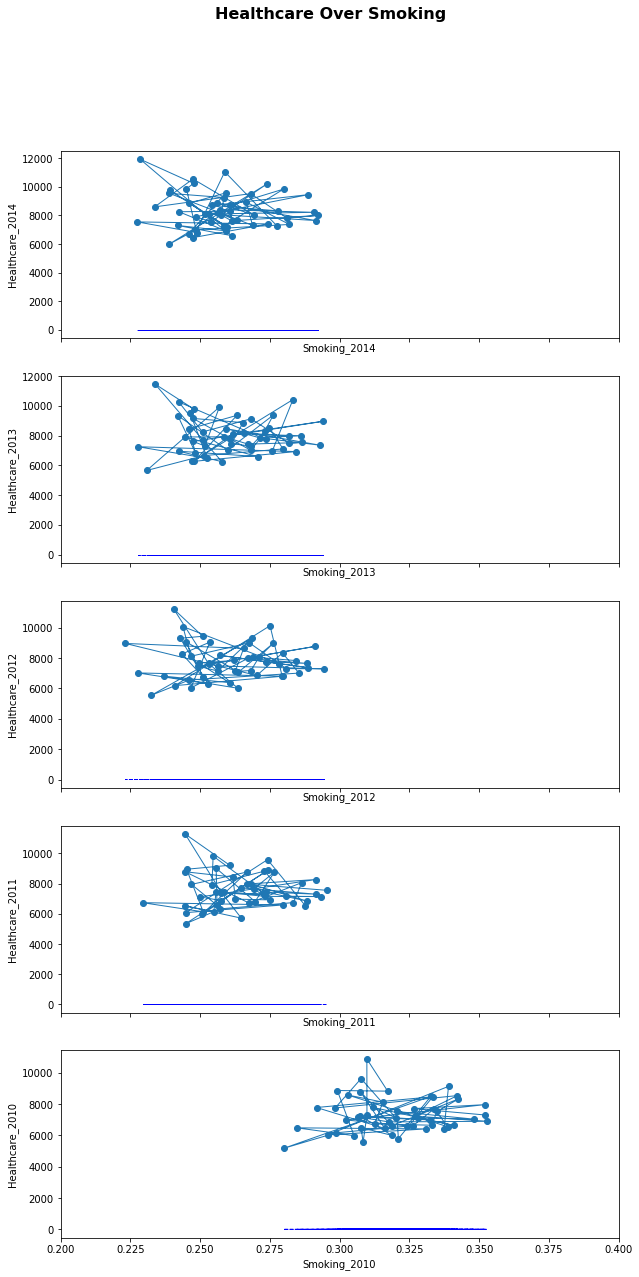

<Figure size 720x1440 with 0 Axes>

In [11]:
# Plot
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True, figsize=(10,20))
fig.suptitle("Healthcare Over Smoking", fontsize=16, fontweight="bold")
plt.figure(figsize=(10,20))


ax1.set_xlim(0.2, 0.4)
ax1.plot(smoking_2014, health_2014, linewidth=1, marker="o")
ax1.plot(smoking_2014, fit_2014, "b--", linewidth=1)
ax1.set_xlabel("Smoking_2014")
ax1.set_ylabel("Healthcare_2014")
#ax1.set_ylim(5000, 12000)

ax2.plot(smoking_2013, health_2013, linewidth=1, marker="o")
ax2.plot(smoking_2013, fit_2013, "b--", linewidth=1)
ax2.set_xlabel("Smoking_2013")
ax2.set_ylabel("Healthcare_2013")

ax3.plot(smoking_2012, health_2012, linewidth=1, marker="o")
ax3.plot(smoking_2012, fit_2012, "b--", linewidth=1)
ax3.set_xlabel("Smoking_2012")
ax3.set_ylabel("Healthcare_2012")

ax4.plot(smoking_2011, health_2011, linewidth=1, marker="o")
ax4.plot(smoking_2011, fit_2011, "b--", linewidth=1)
ax4.set_xlabel("Smoking_2011")
ax4.set_ylabel("Healthcare_2011")

ax5.plot(smoking_2010, health_2010, linewidth=1, marker="o")
ax5.plot(smoking_2010, fit_2010, "b--", linewidth=1)
ax5.set_xlabel("Smoking_2010")
ax5.set_ylabel("Healthcare_2010")

